In [196]:
#importing the supporting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [197]:
#Get in the dataset
df=pd.read_csv('titanic.csv')

In [198]:
#Having a reference of the attributes to go back to
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
#To check if any column is empty
print(df.Pclass.isnull().sum()),print(df.Age.isnull().sum()),print(df.Sex.isnull().sum())

0
177
0


(None, None, None)

In [200]:
#Have an overview of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [201]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [202]:
#Handling the missing values in the Age attribute from the insights we get from df.info
#df['Age'].fillna(df['Age'].mean(), inplace=True)

In [203]:
df['Age']=df['Age'].fillna(df['Age'].mean())
# Check that No NANs in Df['Age']
df.Age.isnull().sum()

0

In [204]:
#dictionary mapping categorical values to int values to be able to work on that attribute
d={'male':0,'female':1}
df['Sex']=df['Sex'].apply(lambda x:d[x])

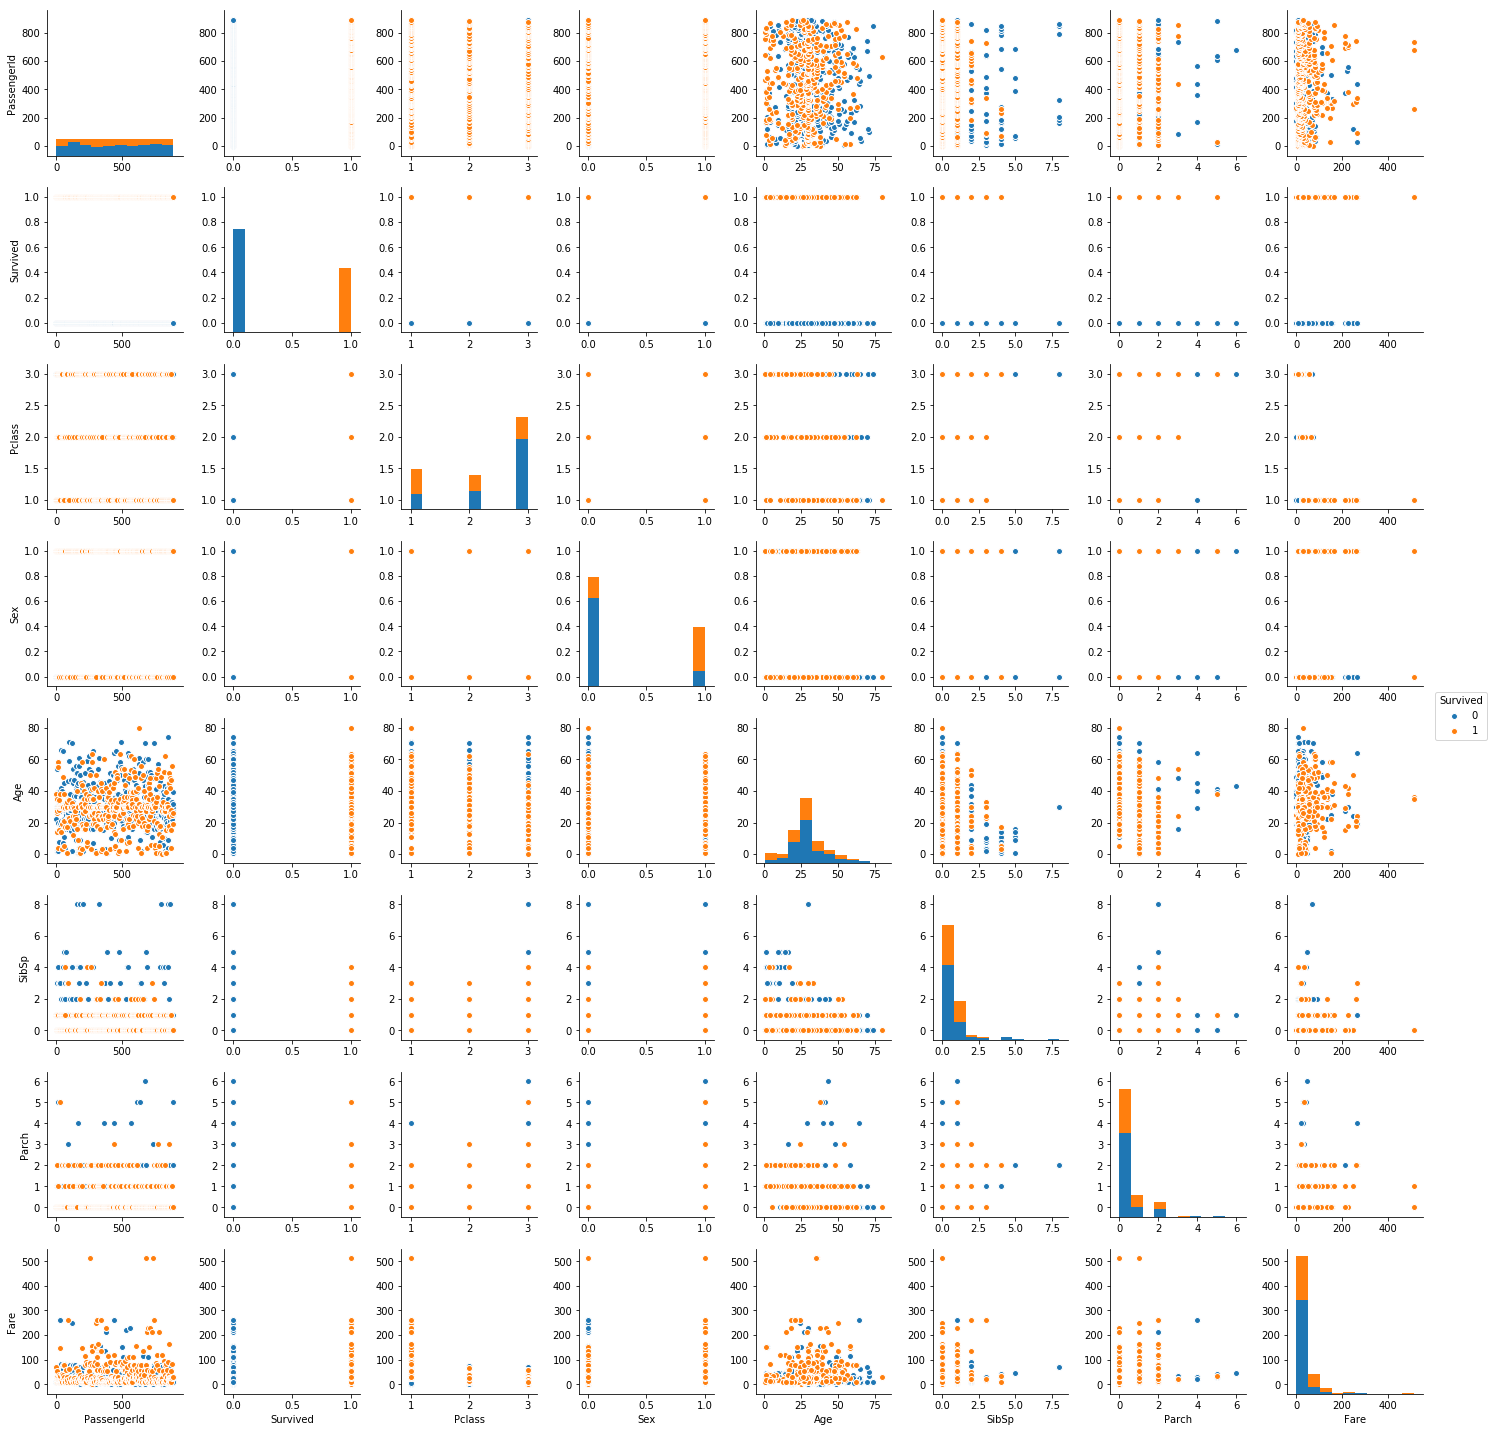

In [205]:
#Plotting pairplots between relationships amongst the variables in the dataset to choose relevant feature predictors
sns.pairplot(df,hue='Survived')

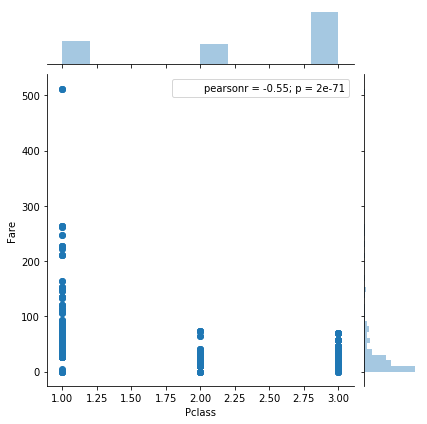

In [206]:
sns.jointplot(x='Pclass',y='Fare',data=df)

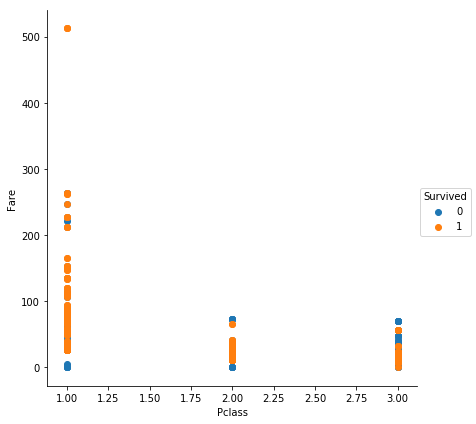

In [207]:
sns.FacetGrid(df,hue='Survived',size=6)\
.map(plt.scatter,'Pclass','Fare')\
.add_legend()

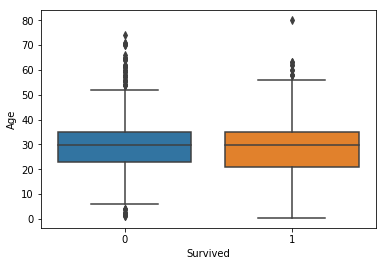

In [208]:
sns.boxplot(x='Survived',y='Age',data=df)

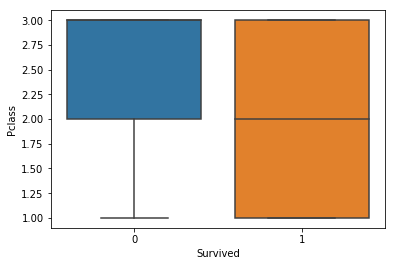

In [209]:
sns.boxplot(x='Survived',y='Pclass',data=df)

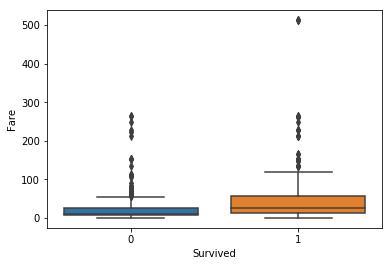

In [210]:
sns.boxplot(x='Survived',y='Fare',data=df)

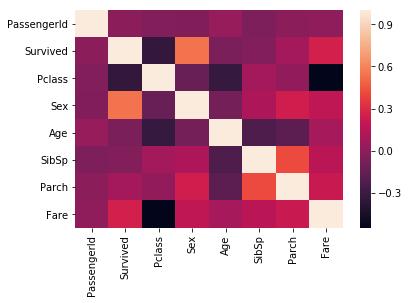

In [211]:
sns.heatmap(df.corr())

In [212]:
#X is set of sets: Only the columns contributing to the prediction of Survival
X=df[['Pclass','Age','Sex','Fare']]
X.head()

,Pclass,Age,Sex,Fare
0,3,22.0,0,7.2500
1,1,38.0,1,71.2833
2,3,26.0,1,7.9250
3,1,35.0,1,53.1000
4,3,35.0,0,8.0500


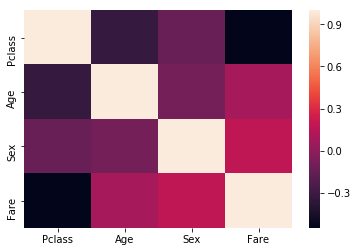

In [213]:
sns.heatmap(X.corr())

In [214]:
#Now we have our outcome variable
Y=df['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [215]:
#importing Logistic Regression model from scikitlearn
from sklearn.linear_model import LogisticRegression

In [216]:
from sklearn.model_selection import train_test_split
#Random state assignment is to maintain consistency of splitted dataset over multiple iterations
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=34)

In [217]:
myLRmodel=LogisticRegression(random_state=34)
#Fitting the Logistic regression model to input attributes producing outcome predictions
myLRmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=34, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [218]:
predict=myLRmodel.predict(X_test)
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [219]:
#But we need the score accuracy and not these predicted values
print('LR Score:')
myLRmodel.score(X_test,Y_test)

LR Score:


0.80269058295964124

In [220]:
#This gives us 80.2% accuracy
from sklearn.metrics import classification_report

In [221]:
Y_pred=myLRmodel.predict(X_test)
#PRecision & Recall
#precision=tp/tp+fp true positive,false positive --> estimated person dead but person alive
#recall=tp/tp+fn true positive,false negative --> estimated person didnt die but he was dead
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       138
          1       0.76      0.71      0.73        85

avg / total       0.80      0.80      0.80       223



In [222]:
#Model 2: Running the same analysis using Linear Support-Vector-Machines to compare the score of accuracy
from sklearn import svm
#polynomial svm: split data with multiple hyperplanes

In [223]:
SVMmodel=svm.LinearSVC(random_state=34)
SVMmodel.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=34, tol=0.0001,
     verbose=0)

In [224]:
SVMmodel.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [225]:
print('SVM Score:')
SVMmodel.score(X_test,Y_test)

SVM Score:


0.81614349775784756

In [226]:
#This gives us 81.6% accuracy

In [227]:
Y_predsvm=SVMmodel.predict(X_test)
print(classification_report(Y_test,Y_predsvm))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       138
          1       0.80      0.69      0.74        85

avg / total       0.81      0.82      0.81       223



In [228]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
myDTmodel=DecisionTreeClassifier(random_state=0)
myDTmodel.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [230]:
myDTmodel.predict(X_test)
print('Decision Tree Score:')
myDTmodel.score(X_test,Y_test)

Decision Tree Score:


0.80717488789237668

In [231]:
myDTmodel.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [232]:
Y_preddtree=myDTmodel.predict(X_test)
print(classification_report(Y_test,Y_preddtree))

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       138
          1       0.76      0.72      0.74        85

avg / total       0.81      0.81      0.81       223



In [233]:
from sklearn.ensemble import RandomForestClassifier
myRFmodel=RandomForestClassifier(random_state=3,n_estimators=10)
myRFmodel.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [234]:
myRFmodel.predict(X_test)
print('Random Forests Score:')
myRFmodel.score(X_test,Y_test)

Random Forests Score:


0.83856502242152464

In [235]:
myRFmodel.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [236]:
Y_predrf=myRFmodel.predict(X_test)
print(classification_report(Y_test,Y_predrf))

             precision    recall  f1-score   support

          0       0.84      0.91      0.87       138
          1       0.84      0.72      0.77        85

avg / total       0.84      0.84      0.84       223



In [237]:
from sklearn.neighbors import KNeighborsClassifier
myKNNmodel=KNeighborsClassifier(n_neighbors=7)
myKNNmodel.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [238]:
myKNNmodel.predict(X_test)
print('KNN Score:')
myKNNmodel.score(X_test,Y_test)

KNN Score:


0.7488789237668162

In [239]:
myKNNmodel.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [240]:
Y_predknn=myKNNmodel.predict(X_test)
print(classification_report(Y_test,Y_predknn))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       138
          1       0.71      0.58      0.64        85

avg / total       0.74      0.75      0.74       223



In [241]:
from sklearn.naive_bayes import BernoulliNB #used when a column in (feature-set are binomial) i-e X has 2 possibilities 
#(Like Gender(0,1) in Titanic)
from sklearn.naive_bayes import MultinomialNB #used when all variables in feature set are countable (integers)
from sklearn.naive_bayes import GaussianNB #used when all variables in feature set are continous

In [242]:
BernNBmodel=BernoulliNB(binarize=True) #we are doing this because the data is not binarized
BernNBmodel.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)

In [243]:
BernNBmodel.predict(X_test)
print('Bernoulli Naive-Bayes Score:')
BernNBmodel.score(X_test,Y_test)
#Obviously because we are forcefully making it binarized so bad prediction score

Bernoulli Naive-Bayes Score:


0.70852017937219736

In [244]:
BernNBmodel.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [245]:
Y_predbern=BernNBmodel.predict(X_test)
print(classification_report(Y_test,Y_predbern))

             precision    recall  f1-score   support

          0       0.72      0.88      0.79       138
          1       0.69      0.44      0.53        85

avg / total       0.70      0.71      0.69       223



In [246]:
MultinomialNBmodel=MultinomialNB() #we are doing this because the data is not binarized
MultinomialNBmodel.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [247]:
MultinomialNBmodel.predict(X_test)
print('Multinomial Naive-Bayes Score:')
MultinomialNBmodel.score(X_test,Y_test)

Multinomial Naive-Bayes Score:


0.6905829596412556

In [248]:
MultinomialNBmodel.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [249]:
Y_predmulti=MultinomialNBmodel.predict(X_test)
print(classification_report(Y_test,Y_predmulti))

             precision    recall  f1-score   support

          0       0.72      0.82      0.77       138
          1       0.62      0.48      0.54        85

avg / total       0.68      0.69      0.68       223



In [250]:
GaussianNBmodel=GaussianNB() #we are doing this because the data is not binarized
GaussianNBmodel.fit(X_train,Y_train)

GaussianNB(priors=None)

In [251]:
GaussianNBmodel.predict(X_test)
print('Gaussian Naive-Bayes Score:')
GaussianNBmodel.score(X_test,Y_test)

Gaussian Naive-Bayes Score:


0.80269058295964124

In [252]:
GaussianNBmodel.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [253]:
Y_predgauss=GaussianNBmodel.predict(X_test)
print(classification_report(Y_test,Y_predgauss))

             precision    recall  f1-score   support

          0       0.84      0.84      0.84       138
          1       0.74      0.74      0.74        85

avg / total       0.80      0.80      0.80       223



In [254]:
#Hence we can conclude that Random-Forests and Support Vector Machines proved to be the best classifiers

In [255]:
#Gaussian Naive-Bayes, Decision Trees and LR as the second best fit

In [256]:
#Linearized Bernoulli Naive-Bayes, Multinomial Naive-Bayes, The KNN model were not good predictor models for this scenario